<a href="https://colab.research.google.com/github/froestiago/pytorch-course/blob/main/04_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Pytorch Custom Datasets

## 0. Importing Pytorch and setting up device-agnostic code

In [2]:
import torch
from torch import nn

In [3]:
# Setup device-agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get data!

we'll use a subset (3 classes, 0.1 data) of the Food101 dataset

In [10]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path} directory already exists... skipping download')
else:
  print(f'{image_path} does not exist, creating it...')
  image_path.mkdir(parents = True,
                   exist_ok = True)

  # download data
  with open(data_path/'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print(f'downloading data')
    f.write(request.content)

  # unzip data
  with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('unziping data')
    zip_ref.extractall(image_path)



data/pizza_steak_sushi directory already exists... skipping download


## 2. one with the data
data preparation and exploration

In [11]:
import os

def walk_through_dir(dir_path):
  """
    walks through dir_path returning its contents.
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'there are {len(dirnames)} directories and {len(filenames)} images in `{dirpath}`.')

In [13]:
walk_through_dir(image_path)

there are 2 directories and 0 images in `data/pizza_steak_sushi`.
there are 3 directories and 0 images in `data/pizza_steak_sushi/train`.
there are 0 directories and 78 images in `data/pizza_steak_sushi/train/pizza`.
there are 0 directories and 72 images in `data/pizza_steak_sushi/train/sushi`.
there are 0 directories and 75 images in `data/pizza_steak_sushi/train/steak`.
there are 3 directories and 0 images in `data/pizza_steak_sushi/test`.
there are 0 directories and 25 images in `data/pizza_steak_sushi/test/pizza`.
there are 0 directories and 31 images in `data/pizza_steak_sushi/test/sushi`.
there are 0 directories and 19 images in `data/pizza_steak_sushi/test/steak`.


In [14]:
# setup train and testing paths

train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing an image

data/pizza_steak_sushi/train/pizza/3338774.jpg
pizza
random image path: data/pizza_steak_sushi/train/pizza/3338774.jpg
image class: pizza
image height: 289
image width: 512


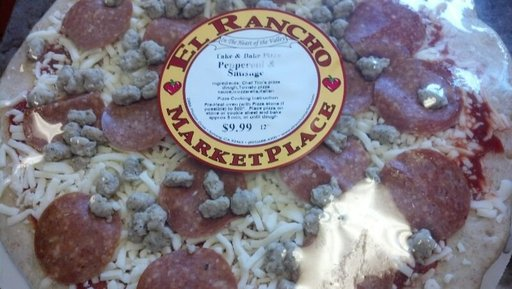

In [28]:
import random
from PIL import Image

# set seed
random.seed(42)

# 1. get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)
print(f'{random_image_path}')

# 3. Get image class from path name (dir name)
image_class = random_image_path.parent.stem
print(f'{image_class}')

# 4. open image
img = Image.open(random_image_path)

# 5. print metadata
print(f'random image path: {random_image_path}')
print(f'image class: {image_class}')
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img